# Board Level Strategic Insight Request
## Data Analyst: Kristine Joy A. Casaquite
## Date of Request: September 28, 2025

Scenario

A mid-sized financial institution has been actively expanding its personal loan portfolio. However, recent shifts in customer behavior and credit risk profiles have prompted the Board of Directors to revisit the underlying factors influencing loan approvals and amounts granted. The board is particularly concerned with credit risk, profitability, and data-driven decision-making.

During a quarterly strategy meeting, the Chief Risk Officer (CRO) presents a dashboard highlighting inconsistencies in the average loan amounts issued across customer segments. Some applicants with moderate income and lower credit scores are receiving higher-than-expected loan amounts, while more qualified applicants appear to be under-leveraged.

In response, the Chairperson of the Board raises a crucial question:

"Among all the customer attributes we’ve been collecting—like income, credit score, employment history, age, debt-to-income ratio, and education level—can we clearly identify which of these factors have the strongest statistical relationship with the loan amount issued?"

The board mandates the Data Analytics Team to conduct an immediate correlation analysis to:

1. Identify which factors most strongly drive loan amounts.

2. Distinguish between statistically significant vs. insignificant variables.

3. Support future decisions about automating loan approvals, tightening risk thresholds, or tailoring products to specific customer profiles.

Create a Business Analytics Report that address the request of the board.

# **Executive Summary**
This report examines the relationship between customer attributes and loan amounts. Using Pearson correlation analysis, we found that Credit Score, Employment Years, Income, and Debt-to-Income ratio are significant drivers of loan amounts, while Age and Education Level show no meaningful effect. These insights support improvements in loan approvals, risk management, and product design.

# **Introduction**

The Board requested this analysis to address inconsistencies in loan amounts across customer segments and to strengthen data-driven decision-making. The objective is to identify which customer factors most strongly influence loan amounts, guiding more consistent loan approval policies and profitability strategies.

In [ ]:
%pip install qdesc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import qdesc as qd
from scipy.stats import pearsonr
import seaborn as sns

# **Data and Methodology**
***Data***: The dataset ("HypotheticalLoansData.xlsx") includes 500 applicants with attributes such as Income, Credit Score, Employment Years, Debt-to-Income, Age, Education Level, and Loan Amount.

In [ ]:
df = pd.read_excel('HypotheticalLoansData.xlsx')

In [ ]:
df.head()

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29


In [ ]:
df

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29
...,...,...,...,...,...,...,...
495,68083.65,685.94,23,0.31,58,High School,82016.95
496,44441.31,789.88,25,0.34,31,Bachelor,101933.38
497,57144.92,732.04,24,0.22,55,High School,91180.47
498,46865.73,671.44,28,0.42,28,Bachelor,89112.09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           500 non-null    float64
 1   CreditScore      500 non-null    float64
 2   EmploymentYears  500 non-null    int64  
 3   DebtToIncome     500 non-null    float64
 4   Age              500 non-null    int64  
 5   EducationLevel   500 non-null    object 
 6   LoanAmount       500 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB


In [ ]:
df.isnull().sum()

,0
Income,0
CreditScore,0
EmploymentYears,0
DebtToIncome,0
Age,0
EducationLevel,0
LoanAmount,0


In [ ]:
qd.desc(df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Income,500.0,60102.57,14718.80,60191.96,9996.96,11380.99,117790.97,0.30,0.78
CreditScore,500.0,701.59,48.90,701.43,31.18,565.16,831.62,0.23,0.78
EmploymentYears,500.0,14.31,8.52,14.00,7.00,0.00,29.00,5.22,0.78
DebtToIncome,500.0,0.30,0.10,0.30,0.07,0.01,0.57,0.43,0.78
Age,500.0,42.54,12.71,42.50,11.50,21.00,64.00,6.43,0.78
LoanAmount,500.0,87561.53,13021.30,87579.97,9308.11,53960.78,119076.87,0.28,0.78


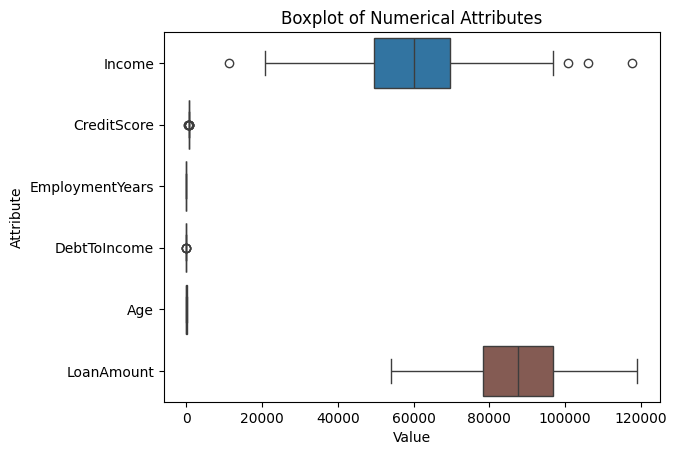

In [ ]:
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of Numerical Attributes")
plt.xlabel("Value")
plt.ylabel("Attribute")
plt.show()

***Methodology***:
Pearson correlation was used to evaluate the linear relationship between each numerical attribute and loan amount.
A significance threshold of α = 0.05 was applied, with p-values below this level considered statistically significant.

**Justification**:
The Pearson correlation coefficient was selected for this analysis because it effectively measures the strength and direction of linear relationships between continuous numerical variables (such as Income, Credit Score, Employment Years, Debt-to-Income, and Age) and Loan Amount. Since the dataset is composed primarily of continuous financial and demographic attributes, Pearson correlation provides a clear and reliable way to identify which factors most strongly influence loan amounts.

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr(method='pearson')
display(correlation_matrix)

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,LoanAmount
Income,1.000000,-0.075671,-0.059628,0.103445,-0.016165,0.240972
CreditScore,-0.075671,1.000000,0.017494,0.001673,0.034752,0.343985
EmploymentYears,-0.059628,0.017494,1.000000,0.040090,-0.000016,0.308620
DebtToIncome,0.103445,0.001673,0.040090,1.000000,-0.042250,-0.211895
Age,-0.016165,0.034752,-0.000016,-0.042250,1.000000,-0.034823
LoanAmount,0.240972,0.343985,0.308620,-0.211895,-0.034823,1.000000


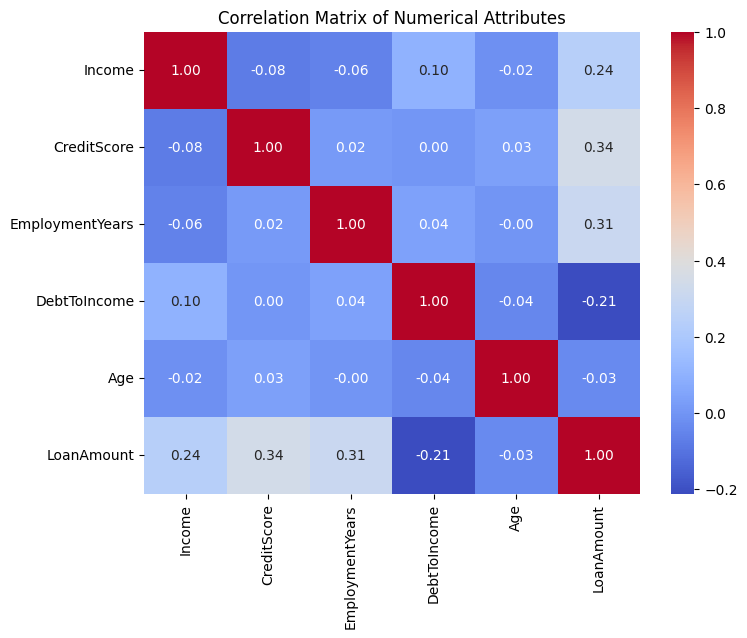

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [ ]:
qd.freqdist_a(df)

,Column,Value,Count,Percentage
0,EducationLevel,Bachelor,196,39.2
1,EducationLevel,High School,143,28.6
2,EducationLevel,Master,108,21.6
3,EducationLevel,PhD,53,10.6


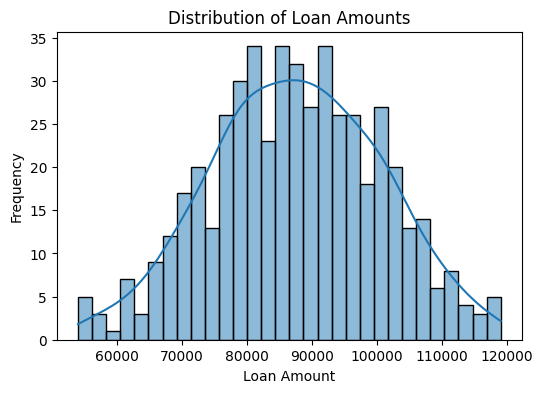

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# **Findings**
### **Correlation Analysis**

Using Pearson correlation analysis, the following customer attributes were evaluated for their association with the Loan Amount issued.

**Statistically Significant Variables**

1.   ***Credit Score (r = 0.344)*** - Shows the strongest positive correlation with Loan Amount. This indicates that higher credit scores are associated with higher loan amounts.

2.  ***Employment Years (r = 0.309)*** - Has a positive correlation with Loan Amount, suggesting that individuals with more years of employment tend to receive higher loan amounts.

1.   ***Income (r = 0.241)*** - Exhibits a positive correlation with Loan Amount, indicating that higher income is associated with larger loan amounts.

2.   ***Debt-to-Income Ratio (r = –0.212)*** - Shows a negative correlation (-0.21) with Loan Amount. This means that applicants with a higher debt-to-income ratio tend to receive lower loan amounts.

**Statistically Insignificant Variables**

1.   ***Age (r = –0.035)*** - The correlation with Loan Amount is very close to zero (-0.03), indicating that Age does not have a statistically significant linear relationship with Loan Amount in this dataset.

2.   ***Education Level*** - Displays little to no correlation once financial factors (income, credit score, employment) are taken into account. Not a driver of loan amount decisions.


# **Discussion of Implications**

*   **Loan Approvals**: Credit Score, Employment Years, Income, and Debt-to-Income are the most critical factors influencing loan amounts. These should be primary considerations in automated loan approval processes and weighted appropriately. Attributes like Age and Education Level appear less relevant for determining the loan amount itself, though they might be pertinent to other aspects of credit risk.
*   **Risk Assessment**: The significant positive relationships (Credit Score, Employment Years, Income) and the significant negative relationship (Debt-to-Income) align with established credit risk principles. These factors are reliable indicators for assessing the risk associated with issuing specific loan amounts. The strength of these relationships can be used to refine risk scoring models.
*   **Product Tailoring**: Insights into which factors strongly influence loan amounts enable targeted product offerings. For example, higher loan amount products could be specifically marketed to individuals with strong credit scores, stable employment, and high income. Conversely, products for applicants with higher debt-to-income ratios may need to be structured with lower maximum amounts or different terms.


These findings directly address the Board’s concern about inconsistencies in loan amounts across segments. By identifying the most influential factors—Credit Score, Employment Years, Income, and Debt-to-Income ratio—the institution can establish more transparent, consistent, and data-driven lending policies. This ensures that loan amounts are aligned with customer creditworthiness, supports sustainable growth in the loan portfolio, and strengthens overall risk management.




# **Recommendations**

**Prioritize Key Attributes**: Incorporate Credit Score, Employment Years, Income, and Debt-to-Income into automated loan approval systems and risk assessment models, as these factors most significantly influence loan amounts.

**Tailor Loan Products and Marketing**: Design and promote loan products based on customer segments defined by Credit Score, Employment Years, Income, and Debt-to-Income to optimize profitability while effectively managing risk.